### Настройка окружения

In [1]:
!pwd

/content


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd  drive/MyDrive/'Colab Notebooks'/Coloring-greyscale-images

/content/drive/MyDrive/Colab Notebooks/Coloring-greyscale-images


In [13]:
!git pull origin alhpa-version

From https://github.com/Evgev/Coloring-greyscale-images
 * branch            alhpa-version -> FETCH_HEAD
Already up to date.


In [11]:
!ls -a

Alpha-version  .git  .gitignore  .idea	LICENSE  README_images	README.md


In [12]:
!git branch

* alhpa-version


### Альфа версия

In [5]:
!pwd

/content


In [4]:
%cd Alpha-version/

/content/drive/MyDrive/Colab Notebooks/Coloring-greyscale-images/Alpha-version


In [5]:
from tensorflow.keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf



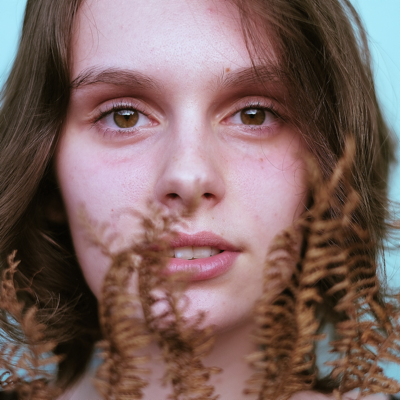

In [6]:
load_img('woman.jpg')

In [66]:
# Get images
image = img_to_array(load_img('woman.jpg'))
image = np.array(image, dtype=float)

In [67]:
X = rgb2lab(1.0/255*image)[:,:,0]
Y = rgb2lab(1.0/255*image)[:,:,1:]


array([[87, 87, 87, ..., 88, 88, 87],
       [87, 87, 87, ..., 88, 87, 88],
       [87, 88, 87, ..., 87, 87, 87],
       ...,
       [ 3,  3,  4, ..., 36, 39, 41],
       [ 3,  3,  4, ..., 28, 31, 32],
       [ 2,  3,  4, ..., 15, 23, 23]], dtype=uint8)
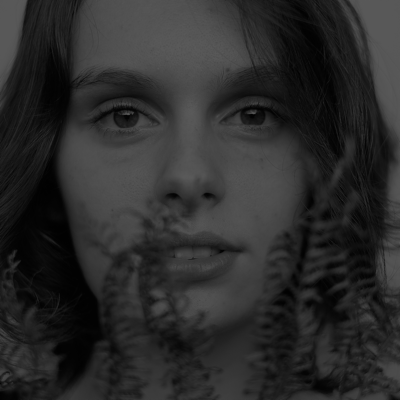

In [68]:
X.astype(np.uint8)

In [69]:
Y /= 128
X = X.reshape(1, 400, 400, 1)
Y = Y.reshape(1, 400, 400, 2)

In [11]:
X.shape

(1, 400, 400, 1)

In [12]:
# Building the neural network
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [13]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <Conv2D name=conv2d_2, built=True>,
 <Conv2D name=conv2d_3, built=True>,
 <Conv2D name=conv2d_4, built=True>,
 <Conv2D name=conv2d_5, built=True>,
 <UpSampling2D name=up_sampling2d, built=True>,
 <Conv2D name=conv2d_6, built=True>,
 <UpSampling2D name=up_sampling2d_1, built=True>,
 <Conv2D name=conv2d_7, built=True>,
 <UpSampling2D name=up_sampling2d_2, built=True>,
 <Conv2D name=conv2d_8, built=True>]

In [14]:
# Finish model
model.compile(optimizer='rmsprop',loss='mse')

In [15]:
model.fit(x=X,
    y=Y,
    batch_size=1,
    epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.0600
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step - loss: 0.5687
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0219
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0150
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0286
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0098
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0073
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0070
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0069
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0067
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0066
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0064
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0063
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0062
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0061
Epoch 16/100
1/1 ━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0036
0.0036054220981895924
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[[198, 225, 230],
        [208, 221, 228],
        [214, 223, 213],
        ...,
        [167, 234, 226],
        [162, 232, 251],
        [221, 215, 255]],

       [[226, 217, 219],
        [207, 223, 221],
        [185, 228, 237],
        ...,
        [168, 234, 220],
        [166, 233, 222],
        [216, 219, 250]],

       [[222, 219, 224],
        [198, 226, 234],
        [178, 227, 254],
        ...,
        [178, 231, 210],
        [182, 230, 220],
        [218, 215, 247]],

       ...,

       [[ 27,   7,   0],
        [ 26,   9,   0],
        [ 26,  10,   0],
        ...,
        [ 95,  83,  80],
        [105,  90,  88],
        [103,  95,  91]],

       [[ 29,   7,   0],
        [ 27,   8,   0],
        [ 28,   9,   0],
        ...,
        [ 75,  64,  58],
        [ 86,  71,  67],
        [ 87,  74,  70]],

       [[ 22,   7,   0],
        [ 22,   9,   0],
        [ 23,  11,   0],
        ...,
        [ 44,  38,  30],
        [ 61,  53,  44],
        [ 58,  54,  43]]], dtype=uint8)
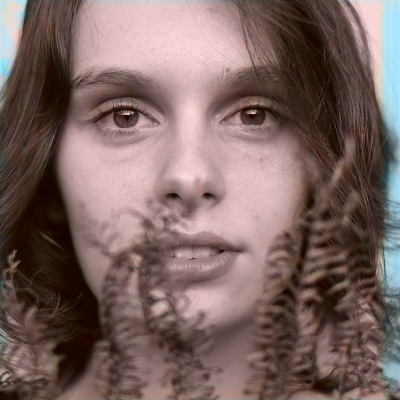

In [70]:

print(model.evaluate(X, Y, batch_size=1))
output = model.predict(X)
output *= 128
# Output colorizations
cur = np.zeros((400, 400, 3))
cur[:,:,0] = X[0][:,:,0]
cur[:,:,1:] = output[0]

cur_rgb = (lab2rgb(cur) * 255).astype(np.uint8)
imsave("img_result.png", cur_rgb)
cur_rgb

### Проверка на изображениях, не участвующих в обучении

In [52]:
image = img_to_array(load_img('man.jpg'))
image = np.array(image, dtype=float)
X = rgb2lab(1.0/255*image)[:,:,0]


array([[ 2,  3,  3, ...,  2,  2,  2],
       [ 2,  3,  3, ...,  2,  2,  2],
       [ 2,  3,  2, ...,  2,  2,  2],
       ...,
       [ 6,  5,  4, ..., 57, 58, 56],
       [ 5,  4,  4, ..., 57, 54, 54],
       [ 7,  4,  4, ..., 56, 53, 50]], dtype=uint8)
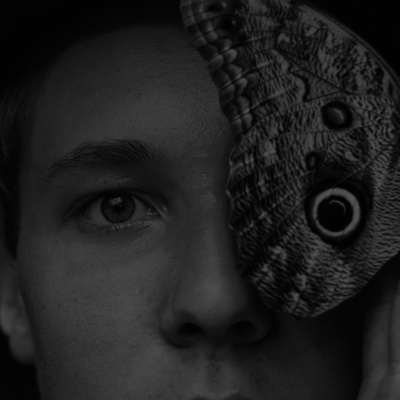

In [54]:
X.astype(np.uint8)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[[  0,  15,  19],
        [  0,  15,  21],
        [  3,  13,   1],
        ...,
        [  0,  22,  14],
        [  0,  21,  34],
        [ 10,   4,  37]],

       [[ 17,   7,  10],
        [  0,  15,  13],
        [  0,  18,  25],
        ...,
        [  0,  23,   9],
        [  0,  22,  11],
        [  4,   7,  33]],

       [[ 11,   7,  13],
        [  0,  16,  23],
        [  0,  18,  37],
        ...,
        [  0,  21,   0],
        [  0,  20,  10],
        [ 10,   6,  33]],

       ...,

       [[ 31,  16,   0],
        [ 29,  13,   0],
        [ 28,  12,   0],
        ...,
        [149, 136, 132],
        [152, 136, 133],
        [142, 132, 129]],

       [[ 31,  13,   0],
        [ 29,  12,   0],
        [ 28,  11,   0],
        ...,
        [148, 136, 129],
        [144, 127, 122],
        [142, 128, 123]],

       [[ 31,  21,  11],
        [ 24,  12,   0],
        [ 23,  11,   0],
        ...,
        [143, 134, 125],
        [135, 126, 116],
        [125, 121, 107]]], dtype=uint8)
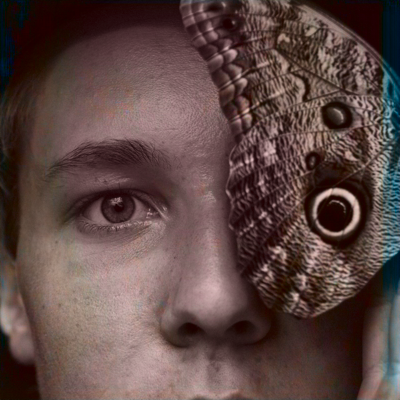

In [63]:
# Предсказанное значение
X = X.reshape(1, 400, 400, 1)
tatget = model.predict(X)
tatget *= 128
# Output colorizations
cur = np.zeros((400, 400, 3))
cur[:,:,0] = X[0][:,:,0]
cur[:,:,1:] = output[0]

cur_rgb = (lab2rgb(cur) * 255).astype(np.uint8)
cur_rgb

array([[[  5,  11,  13],
        [  7,  15,  17],
        [  6,  12,  14],
        ...,
        [  4,  10,  12],
        [  5,  12,  14],
        [  6,  11,  14]],

       [[  5,  11,  14],
        [  6,  13,  16],
        [  6,  12,  15],
        ...,
        [  5,  12,  14],
        [  4,  10,  13],
        [  4,  11,  13]],

       [[  5,  10,  13],
        [  6,  13,  15],
        [  6,  12,  13],
        ...,
        [  4,  10,  13],
        [  5,  11,  13],
        [  5,  12,  14]],

       ...,

       [[ 15,  21,  21],
        [ 13,  18,  19],
        [ 13,  17,  18],
        ...,
        [173, 129, 116],
        [172, 130, 118],
        [167, 125, 115]],

       [[ 13,  19,  19],
        [ 13,  17,  18],
        [ 12,  16,  17],
        ...,
        [173, 129, 116],
        [164, 121, 110],
        [164, 121, 112]],

       [[ 19,  24,  26],
        [ 12,  16,  15],
        [ 11,  15,  14],
        ...,
        [170, 126, 113],
        [161, 118, 107],
        [154, 111, 102]]], dtype=uint8)
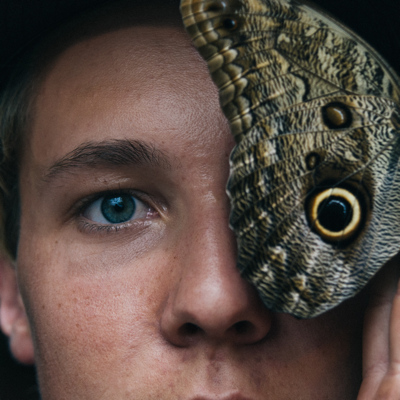

In [64]:
# Оригинал
image.astype(np.uint8)

Сохраниение